# Reconocimiento Facial

In [5]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
#libreria para descargar caras.
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [4]:
print(faces.images.shape)

(1348, 62, 47)


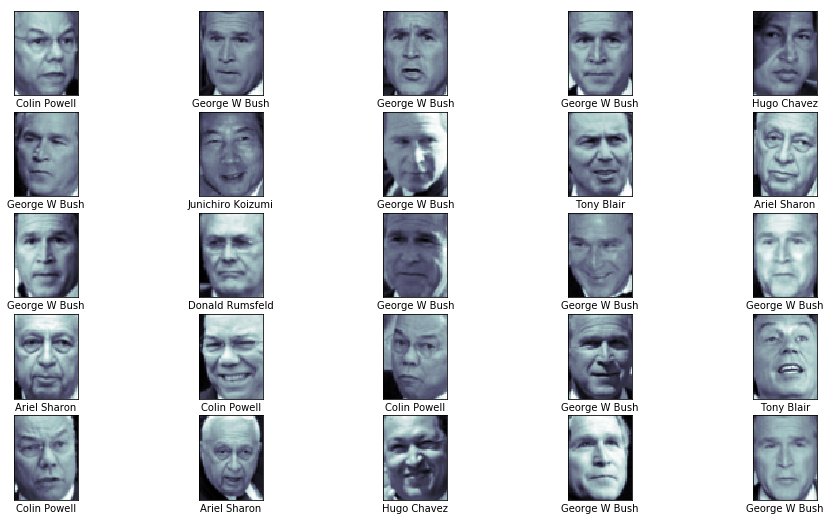

In [10]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [58]:
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
n_components = 150
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

In [65]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [66]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [76]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [0.1, 1, 5, 10, 50],
         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [77]:
print(clf.best_params_)

{'C': 10, 'gamma': 0.001}


In [78]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)

Predicting the people names on the testing set


In [79]:
print(classification_report(y_test, y_pred, target_names=target_names))
#Recall -> sensibilidad (cuantas veces no es catalogado como tal.)

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(0.5, 0.98, 'Predicciones de las imagenes (incorrectas en rojo)')

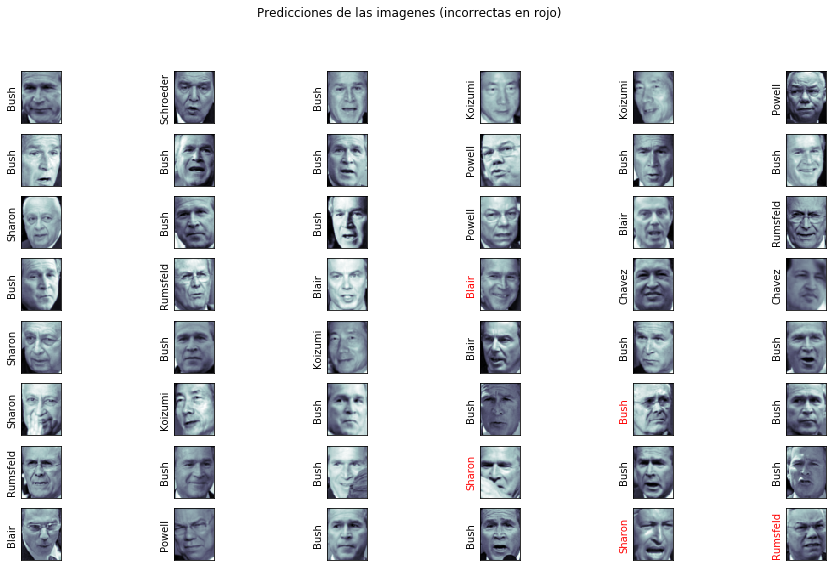

In [82]:
fig, ax = plt.subplots(8,6, figsize= (16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(X_test[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
        color="black" if y_pred[i]==y_test[i] else "red")

fig.suptitle("Predicciones de las imagenes (incorrectas en rojo)")

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
mat = confusion_matrix(y_test,y_pred)

In [89]:
import seaborn as sns; sns.set()

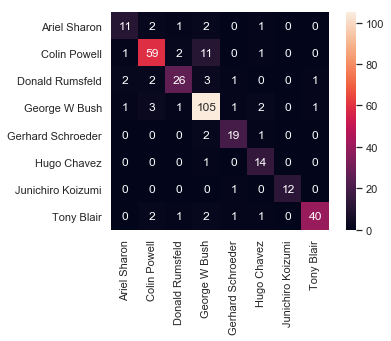

In [90]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, xticklabels=faces.target_names, yticklabels=faces.target_names)